___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

# Tasks

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
import shap
import pickle

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
male = pd.read_csv('ansur_ii_male_public.csv')

In [3]:
female = pd.read_csv('ansur_ii_female_public.csv')

In [4]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,2010-10-04,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,2010-10-04,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,2010-10-04,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,2010-10-12,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585

In [5]:
male.shape

(4082, 108)

In [6]:
female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,2010-10-05,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,2010-10-05,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,2010-10-05,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,2010-10-05,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,18

In [7]:
female.shape

(1986, 108)

In [4]:
df = pd.concat([male,female],axis=0,ignore_index=True)

In [54]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,2010-10-04,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,2010-10-04,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,2010-10-04,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,2010-10-12,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585

In [55]:
df.shape

(6068, 108)

## Explore Data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [7]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       6068 non-null   int64 
 1   abdominalextensiondepthsitting  6068 non-null   int64 
 2   acromialheight                  6068 non-null   int64 
 3   acromionradialelength           6068 non-null   int64 
 4   anklecircumference              6068 non-null   int64 
 5   axillaheight                    6068 non-null   int64 
 6   balloffootcircumference         6068 non-null   int64 
 7   balloffootlength                6068 non-null   int64 
 8   biacromialbreadth               6068 non-null   int64 
 9   bicepscircumferenceflexed       6068 non-null   int64 
 10  bicristalbreadth                6068 non-null   int64 
 11  bideltoidbreadth                6068 non-null   int64 
 12  bimalleolarbreadth              6068 non-null  

In [13]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [58]:
df.nunique()

subjectid                         6068
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

In [33]:

def detect_outliers_iqr(df):
    object_col = df.select_dtypes(include=('number')).columns
    for column in object_col:
        outliers = 0
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

     
        print(f"{i:<30}:", len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]))
        print()


detect_outliers_iqr(df)


writingpreference             : 1

writingpreference             : 46

writingpreference             : 17

writingpreference             : 41

writingpreference             : 77

writingpreference             : 30

writingpreference             : 18

writingpreference             : 18

writingpreference             : 3

writingpreference             : 19

writingpreference             : 58

writingpreference             : 10

writingpreference             : 6

writingpreference             : 48

writingpreference             : 17

writingpreference             : 18

writingpreference             : 63

writingpreference             : 42

writingpreference             : 48

writingpreference             : 36

writingpreference             : 32

writingpreference             : 55

writingpreference             : 13

writingpreference             : 24

writingpreference             : 15

writingpreference             : 29

writingpreference             : 11

writingpreference             :

In [16]:
df[df.duplicated()]
# df.duplicated()
# df.duplicated().any()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference


In [17]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df.select_dtypes('number')).corr().style.applymap(color_red)

In [34]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

<AxesSubplot:>

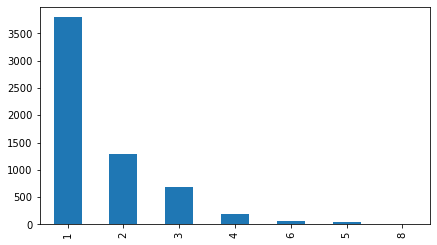

In [35]:
df.dodrace.value_counts().plot(kind='bar')

In [5]:
# Filter and select only the numeric columns
numeric_columns = df.select_dtypes(include=['object']).columns
numeric_columns

Index(['gender', 'date', 'installation', 'component', 'branch', 'primarymos',
       'subjectsbirthlocation', 'ethnicity', 'writingpreference'],
      dtype='object')

In [6]:
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

gender                        : 2
date                          : 253
installation                  : 12
component                     : 3
branch                        : 3
primarymos                    : 285
subjectsbirthlocation         : 152
ethnicity                     : 209
writingpreference             : 3


In [65]:
df.shape

(6068, 108)

-  ethnicity : is same as subjectsbirthlocation and has many missing values so we drop it 
-  date : has no effect in the race 
-  subjectid : has no effect
-  SubjectNumericRace : and DODRace often indicate the same race so we drop SubjectNumericRace
-  Installation : not usefull
-  Heightin  dublicates from stature
-  Weightlbs : dublicates from weightkg 

In [7]:
droped_col = ['ethnicity','date','subjectid','subjectnumericrace','installation','heightin','weightlbs','primarymos']
df.drop(columns=droped_col, inplace=True)

####  Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [12]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [8]:
dod = df.dodrace.value_counts()[df.dodrace.value_counts() < 500].index

In [9]:
for i in dod:
    drop_index = df[df['dodrace'] == i].index
    df.drop(index = drop_index , inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [38]:
df.shape

(5769, 100)

#### subjectsbirthlocation values less than 100 replace it with other

In [17]:
df.subjectsbirthlocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [11]:
less_hundred = df.subjectsbirthlocation.value_counts()[df.subjectsbirthlocation.value_counts() <= 50].index

In [63]:
dic = {
    "country" : less_hundred,
    "values" : df.subjectsbirthlocation.value_counts()[less_hundred]
}
pd.DataFrame(dic)

,country,values
Oregon,Oregon,40
Mexico,Mexico,39
Connecticut,Connecticut,36
Jamaica,Jamaica,35
Nebraska,Nebraska,30
Utah,Utah,27
West Virginia,West Virginia,26
Nevada,Nevada,21
Idaho,Idaho,20
District of Columbia,District of Columbia,19


In [12]:
df['subjectsbirthlocation'] = df['subjectsbirthlocation'].replace(less_hundred,'other')

In [13]:
df.subjectsbirthlocation.value_counts()

other             716
California        417
New York          411
Texas             386
Indiana           264
Florida           210
Illinois          210
Oklahoma          205
Minnesota         194
Michigan          194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Germany            90
New Jersey         88
Puerto Rico        88
Missouri           83
Colorado           78
Maryland           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
Arkansas           53
South Dakota       53
Name: subjectsbirthlocation, dtype: int64

In [92]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,component,branch,primarymos,subjectsbirthlocation,dodrace,age,writingpreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Regular Army,Combat Arms,19D,other,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Regular Army,Combat Support,68W,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Regular Army,Combat Support,68W,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Regular Army,Combat Service Support,88M,other,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Regular Army,Combat Service Support,92G,North Carolina,2,21,Right hand


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [14]:
x = df.drop('dodrace',axis=1)
y = df['dodrace']
print(x.shape)
print(y.shape)

(5769, 99)
(5769,)


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
y_train.value_counts()

1    3034
2    1038
3     543
Name: dodrace, dtype: int64

In [17]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

gender                        : 2
component                     : 3
branch                        : 3
subjectsbirthlocation         : 35
writingpreference             : 3


In [18]:
for i in numeric_columns:
    if (df[i].unique().size)<=9:
        print(i+": " ,df[i].unique(), "\nsize is: ", df[i].unique().size)
        print("\n")

gender:  ['Male' 'Female'] 
size is:  2


component:  ['Regular Army' 'Army National Guard' 'Army Reserve'] 
size is:  3


branch:  ['Combat Arms' 'Combat Support' 'Combat Service Support'] 
size is:  3


writingpreference:  ['Right hand' 'Left hand' 'Either hand (No preference)'] 
size is:  3




- ordinal encoder

In [19]:
gender_cat = ['Male', 'Female']
component_cat=  ['Regular Army' ,'Army National Guard' ,'Army Reserve']
branch_cat =  ['Combat Arms', 'Combat Support', 'Combat Service Support']
writingpreference_cat =  ['Right hand', 'Left hand', 'Either hand (No preference)']
ordinal_cat = [gender_cat, component_cat, branch_cat, writingpreference_cat]
ordinal_features = ['gender','component','branch','writingpreference']

- one-hot encoder

In [20]:
one_hot = ['subjectsbirthlocation']

- column transformer

In [21]:
column_transformer = make_column_transformer(
( OneHotEncoder(), one_hot ),
( OrdinalEncoder(categories= ordinal_cat), ordinal_features ),
remainder = 'passthrough'
)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [22]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Vanilla Logistic Model

In [23]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(x_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
        

In [24]:
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[716  10  32]
 [ 16 241   3]
 [ 57  11  68]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       758
           2       0.92      0.93      0.92       260
           3       0.66      0.50      0.57       136

    accuracy                           0.89      1154
   macro avg       0.83      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2930   22   82]
 [  52  974   12]
 [ 195   27  321]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.95      0.94      0.95      1038
           3       0.77      0.59      0.67       543

    accuracy                           0.92      4615
   macro avg       0.88      0.83      0.85      4615
weighted avg       0.91      0.92      0.91      4615



In [25]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.895560
train_accuracy              0.915686
test_precision_weighted     0.891083
train_precision_weighted    0.911679
test_recall_weighted        0.895560
train_recall_weighted       0.915686
test_f1_weighted            0.891295
train_f1_weighted           0.911911
dtype: float64

### Logistic Model GridsearchCV

In [26]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

In [27]:
pipe_model.get_params()

{'memory': None,
 'steps': [('column_transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['subjectsbirthlocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Male', 'Female'],
                                                               ['Regular Army',
                                                                'Army National '
                                                                'Guard',
                                                                'Army Reserve'],
                                                               ['Combat Arms',
                                                                'Combat Support',
                                                                'Combat Service '
                                                                'Support']

In [29]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}

In [30]:
grid_model = GridSearchCV(pipe_model, param_grid = param_grid, cv=5, return_train_score=True)

In [31]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                      

In [32]:
grid_model.best_params_

{'logistic__C': 0.1, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}

In [33]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.896425
mean_train_score    0.911918
Name: 7, dtype: object

In [34]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[720   9  29]
 [ 19 239   2]
 [ 58   9  69]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       758
           2       0.93      0.92      0.92       260
           3       0.69      0.51      0.58       136

    accuracy                           0.89      1154
   macro avg       0.84      0.79      0.81      1154
weighted avg       0.88      0.89      0.89      1154


Train_Set
[[2932   26   76]
 [  57  965   16]
 [ 201   31  311]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.94      0.93      0.94      1038
           3       0.77      0.57      0.66       543

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



f1_hespanic = make_scorer(f1_score, average = None, labels =[3])
precision_hespanic = make_scorer(precision_score, average = None, labels =[3])
recall_hespanic = make_scorer(recall_score, average = None, labels =[3])


scoring = {"f1_hespanic":f1_hespanic,
           "precision_hespanic":precision_hespanic,
           "recall_hespanic":recall_hespanic}

In [35]:
grid_model = GridSearchCV(pipe_model, param_grid = param_grid, 
                          cv=5, scoring=make_scorer(f1_score, average = None, 
                                                    labels =[3]), return_train_score=True)

In [36]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                      

In [37]:
grid_model.best_params_

{'logistic__C': 1, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}

In [38]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.606061
mean_train_score    0.681655
Name: 11, dtype: object

In [39]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[716  10  32]
 [ 16 241   3]
 [ 57  11  68]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       758
           2       0.92      0.93      0.92       260
           3       0.66      0.50      0.57       136

    accuracy                           0.89      1154
   macro avg       0.83      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2930   22   82]
 [  52  974   12]
 [ 195   27  321]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.95      0.94      0.95      1038
           3       0.77      0.59      0.67       543

    accuracy                           0.92      4615
   macro avg       0.88      0.83      0.85      4615
weighted avg       0.91      0.92      0.91      4615



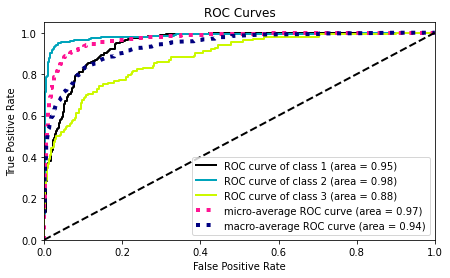

In [40]:
y_pred_proba = grid_model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

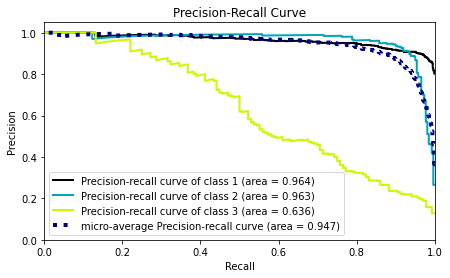

In [41]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [88]:
y_pred = grid_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
log_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 2. SVC

### Vanilla SVC model 

In [44]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("svm", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(x_train, y_train)
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[739  10   9]
 [ 26 233   1]
 [ 77   9  50]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.92      0.90      0.91       260
           3       0.83      0.37      0.51       136

    accuracy                           0.89      1154
   macro avg       0.88      0.75      0.78      1154
weighted avg       0.88      0.89      0.87      1154


Train_Set
[[2999   11   24]
 [  64  969    5]
 [ 242   24  277]]
              precision    recall  f1-score   support

           1       0.91      0.99      0.95      3034
           2       0.97      0.93      0.95      1038
           3       0.91      0.51      0.65       543

    accuracy                           0.92      4615
   macro avg       0.93      0.81      0.85      4615
weighted avg       0.92      0.92      0.91      4615



In [45]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy               0.882340
train_accuracy              0.919502
test_precision_weighted     0.878890
train_precision_weighted    0.920727
test_recall_weighted        0.882340
train_recall_weighted       0.919502
test_f1_weighted            0.868179
train_f1_weighted           0.910973
dtype: float64

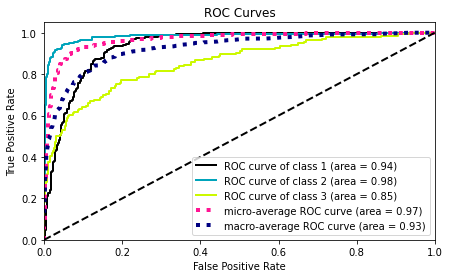

In [46]:
y_pred_proba = pipe_model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

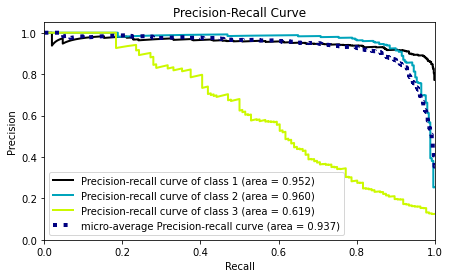

In [47]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

###  SVC Model GridsearchCV

In [72]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [73]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="f1_weighted",
                              cv=5,
                              return_train_score=True)


In [74]:
svm_model_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                      

In [77]:
svm_model_grid.best_params_

{'SVC__C': 0.05,
 'SVC__class_weight': None,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [78]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.894908
mean_train_score    0.912405
Name: 25, dtype: object

In [79]:
eval_metric(svm_model_grid, x_train, y_train, x_test, y_test)

Test_Set
[[717  12  29]
 [ 20 238   2]
 [ 60   8  68]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       758
           2       0.92      0.92      0.92       260
           3       0.69      0.50      0.58       136

    accuracy                           0.89      1154
   macro avg       0.84      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2939   27   68]
 [  65  954   19]
 [ 199   29  315]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.94      0.92      0.93      1038
           3       0.78      0.58      0.67       543

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



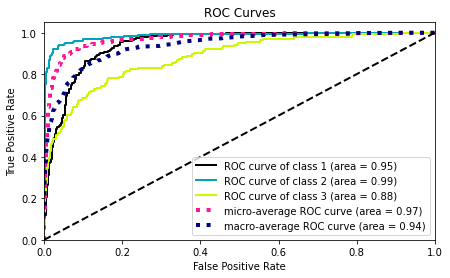

In [80]:
y_pred_proba = svm_model_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

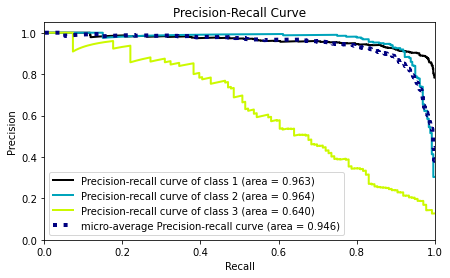

In [81]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [90]:
y_pred = svm_model_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
svm_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
svm_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svm_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

### Vanilla RF Model

In [94]:
operations = [("column_transformer", column_transformer ), ("random", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(x_train, y_train)
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[736  18   4]
 [ 60 199   1]
 [100  12  24]]
              precision    recall  f1-score   support

           1       0.82      0.97      0.89       758
           2       0.87      0.77      0.81       260
           3       0.83      0.18      0.29       136

    accuracy                           0.83      1154
   macro avg       0.84      0.64      0.66      1154
weighted avg       0.83      0.83      0.80      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [97]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy               0.820152
train_accuracy              1.000000
test_precision_weighted     0.817397
train_precision_weighted    1.000000
test_recall_weighted        0.820152
train_recall_weighted       1.000000
test_f1_weighted            0.784819
train_f1_weighted           1.000000
dtype: float64

### RF Model GridsearchCV

##### for random forest we most use ordinal encoder only 

In [112]:
enc_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cols_ordinal = ['subjectsbirthlocation','gender','component','branch','writingpreference']

cols_trans_ord = make_column_transformer((enc_ord, cols_ordinal),
                                     remainder='passthrough', verbose_feature_names_out=False)

In [115]:
param_grid = {
    'random__n_estimators': [64, 128, 200],
    'random__max_features': [2, 4, 'sqrt'],
    'random__max_depth': [2, 3, 4],
    'random__min_samples_split': [2, 3, 4],
    'random__min_samples_leaf': [2, 3, 4],
    'random__max_samples': [0.8, 1]
}

In [116]:
operations = [("column_transformer", cols_trans_ord ),  ("random", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)

random_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="f1_weighted",
                              cv=5,
                              return_train_score=True).fit(x_train,y_train)

In [117]:
eval_metric(random_model_grid, x_train, y_train, x_test, y_test)

Test_Set
[[754   4   0]
 [143 117   0]
 [129   7   0]]
              precision    recall  f1-score   support

           1       0.73      0.99      0.85       758
           2       0.91      0.45      0.60       260
           3       0.00      0.00      0.00       136

    accuracy                           0.75      1154
   macro avg       0.55      0.48      0.48      1154
weighted avg       0.69      0.75      0.69      1154


Train_Set
[[3022   12    0]
 [ 492  546    0]
 [ 524   19    0]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.85      3034
           2       0.95      0.53      0.68      1038
           3       0.00      0.00      0.00       543

    accuracy                           0.77      4615
   macro avg       0.56      0.51      0.51      4615
weighted avg       0.70      0.77      0.71      4615



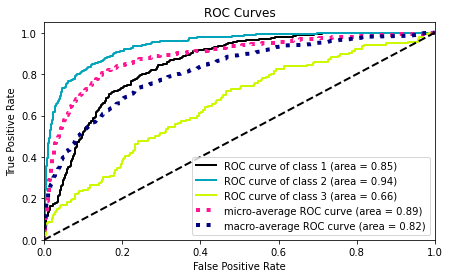

In [118]:
y_pred_proba = random_model_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

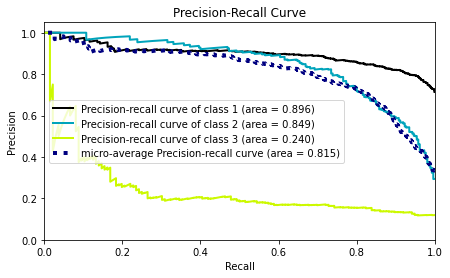

In [119]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [121]:
y_pred = random_model_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
random_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
random_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
random_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 4. XGBoost

##### for xgboost we most use ordinal encoder only and use label encoder for the target class

In [122]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

### Vanilla XGBoost Model

In [123]:
steps_xg = [("OrdinalEncoder", cols_trans_ord), ("xgboost", XGBClassifier(random_state=42))]
pipe_xg = Pipeline(steps=steps_xg)
pipe_xg.fit(x_train, y_train_le)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['subjectsbirthlocation',
                                                   'gender', 'component',
                                                   'branch',
                                                   'writingpreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree', callb...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learni

In [124]:
eval_metric(pipe_xg, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[728  17  13]
 [ 33 226   1]
 [ 75  13  48]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.88      0.87      0.88       260
           2       0.77      0.35      0.48       136

    accuracy                           0.87      1154
   macro avg       0.84      0.73      0.76      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [128]:
pipe_xg_h = Pipeline(steps = steps_xg)
scores_xg_h = cross_validate(pipe_xg_h,
                        x_train,
                        y_train_le,
                        scoring = make_scorer(f1_score, labels = [2],  pos_label =1, average=None),
                        cv = 5,
                        return_train_score=True)
df_scores_xg_h = pd.DataFrame(scores_xg_h, index = range(1, 6))

df_scores_xg_h.mean()[2:]

test_score     0.474939
train_score    1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [130]:
parameters_xgb = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8],
              "xgboost__colsample_bytree":[0.5,0.7]}
xgb_pipe_op = Pipeline(steps = steps_xg)
xgb_grid = GridSearchCV(xgb_pipe_op, parameters_xgb, scoring=make_scorer(f1_score, labels = [2],  pos_label =1, average=None), n_jobs=1,
                        return_train_score=True)
xgb_grid.fit(x_train, y_train_le)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['subjectsbirthlocation',
                                                                          'gender',
                                                                          'component',
                                                                          'branch',
                                                                          'writingpreference'])],
                                                          verbose_feature_names_out=F

In [131]:
eval_metric(xgb_grid, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[730  15  13]
 [ 32 224   4]
 [ 80  15  41]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.88      0.86      0.87       260
           2       0.71      0.30      0.42       136

    accuracy                           0.86      1154
   macro avg       0.82      0.71      0.74      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[3031    2    1]
 [  12 1026    0]
 [  36    3  504]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       1.00      0.99      0.99      1038
           2       1.00      0.93      0.96       543

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



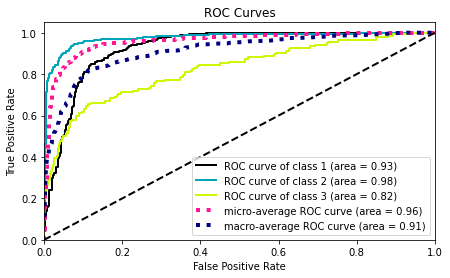

In [132]:
y_pred_proba = xgb_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

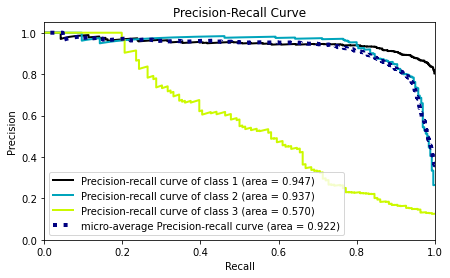

In [133]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [224]:
y_pred = xgb_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
xgb_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[2])

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [144]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as impip

## Logistic Regression Over/ Under Sampling

In [145]:
#
#not majority
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
#over = SMOTE(sampling_strategy = "minority",random_state = 101)
#X_train_t = column_transformer.fit_transform(x_train)
#X_train_o, y_train_o = under.fit_resample(X_train_t, y_train)
#X_train_o, y_train_o = over.fit_resample(X_train_o, y_train_o)

In [146]:
steps_os = [('transformer', column_transformer), ('under', under) ,('scaler', StandardScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
               

In [147]:
eval_metric(pipe_os_lr, x_train, y_train, x_test, y_test)

Test_Set
[[721   8  29]
 [ 22 233   5]
 [ 58   9  69]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       758
           2       0.93      0.90      0.91       260
           3       0.67      0.51      0.58       136

    accuracy                           0.89      1154
   macro avg       0.83      0.78      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2936   15   83]
 [  75  932   31]
 [ 194   21  328]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.96      0.90      0.93      1038
           3       0.74      0.60      0.67       543

    accuracy                           0.91      4615
   macro avg       0.87      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [148]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                             

In [149]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[723   5  30]
 [ 23 232   5]
 [ 58   7  71]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       758
           2       0.95      0.89      0.92       260
           3       0.67      0.52      0.59       136

    accuracy                           0.89      1154
   macro avg       0.84      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2947   13   74]
 [  87  915   36]
 [ 208   24  311]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      3034
           2       0.96      0.88      0.92      1038
           3       0.74      0.57      0.65       543

    accuracy                           0.90      4615
   macro avg       0.87      0.81      0.83      4615
weighted avg       0.90      0.90      0.90      4615



In [162]:
grid_model.best_params_

{'logistic__C': 0.1, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}

In [152]:
y_pred = grid_model.predict(x_test)
y_pred_proba = grid_model.predict_proba(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
over_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
over_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
over_recall = recall_score(y_test, y_pred, average=None, labels=[3])

# Compare Models

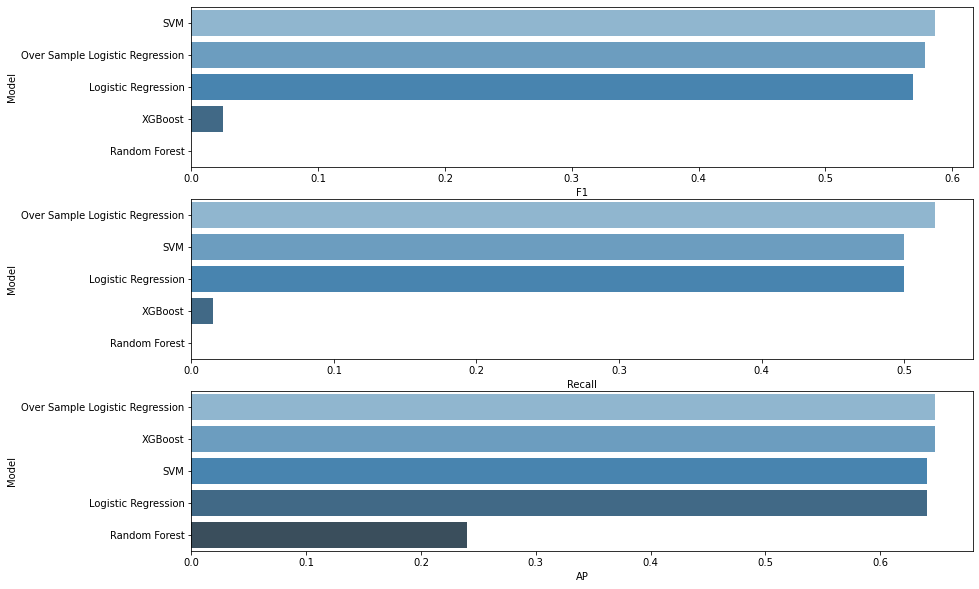

In [159]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Over Sample Logistic Regression" ,"SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svm_f1[0], over_f1[0], random_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], over_recall[0], svm_recall[0], random_recall[0], xgb_recall[0]],
        "AP": [log_AP, over_AP, svm_AP, random_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")

plt.show();

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

##### shap doesnt work with pipeline, so we will implement everything maniual 

In [160]:
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
X_train_o, y_train_o = under.fit_resample(x_train, y_train)

In [176]:
cols = x.select_dtypes(include=['object']).columns
cols

Index(['gender', 'component', 'branch', 'subjectsbirthlocation',
       'writingpreference'],
      dtype='object')

In [178]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [179]:
x_train_sha = column_trans.fit_transform(X_train_o)
x_test_sha = column_trans.transform(x_test)

In [186]:
#since we will make a feature selection, we need to make the penalty hyper_parameter l1 (lasso)
logistic_sha = LogisticRegression(penalty="l1", solver="saga")
logistic_sha.fit(x_train_sha, y_train_o)

LogisticRegression(penalty='l1', solver='saga')

In [187]:
eval_metric(logistic_sha, x_train_sha, y_train_o, x_test_sha, y_test)

Test_Set
[[724   9  25]
 [ 24 230   6]
 [ 60   8  68]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.92       758
           2       0.93      0.88      0.91       260
           3       0.69      0.50      0.58       136

    accuracy                           0.89      1154
   macro avg       0.84      0.78      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2937   17   80]
 [  45  484   14]
 [ 206   24  313]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.92      0.89      0.91       543
           3       0.77      0.58      0.66       543

    accuracy                           0.91      4120
   macro avg       0.87      0.81      0.84      4120
weighted avg       0.90      0.91      0.90      4120



In [188]:
features = column_trans.get_feature_names_out()
features

array(['gender_Female', 'gender_Male', 'component_Army National Guard',
       'component_Army Reserve', 'component_Regular Army',
       'branch_Combat Arms', 'branch_Combat Service Support',
       'branch_Combat Support', 'subjectsbirthlocation_Alabama',
       'subjectsbirthlocation_Arizona', 'subjectsbirthlocation_Arkansas',
       'subjectsbirthlocation_California',
       'subjectsbirthlocation_Colorado', 'subjectsbirthlocation_Florida',
       'subjectsbirthlocation_Georgia', 'subjectsbirthlocation_Germany',
       'subjectsbirthlocation_Illinois', 'subjectsbirthlocation_Indiana',
       'subjectsbirthlocation_Iowa', 'subjectsbirthlocation_Kansas',
       'subjectsbirthlocation_Kentucky',
       'subjectsbirthlocation_Louisiana',
       'subjectsbirthlocation_Maryland',
       'subjectsbirthlocation_Massachusetts',
       'subjectsbirthlocation_Michigan',
       'subjectsbirthlocation_Minnesota',
       'subjectsbirthlocation_Mississippi',
       'subjectsbirthlocation_Missouri

#### shap for train

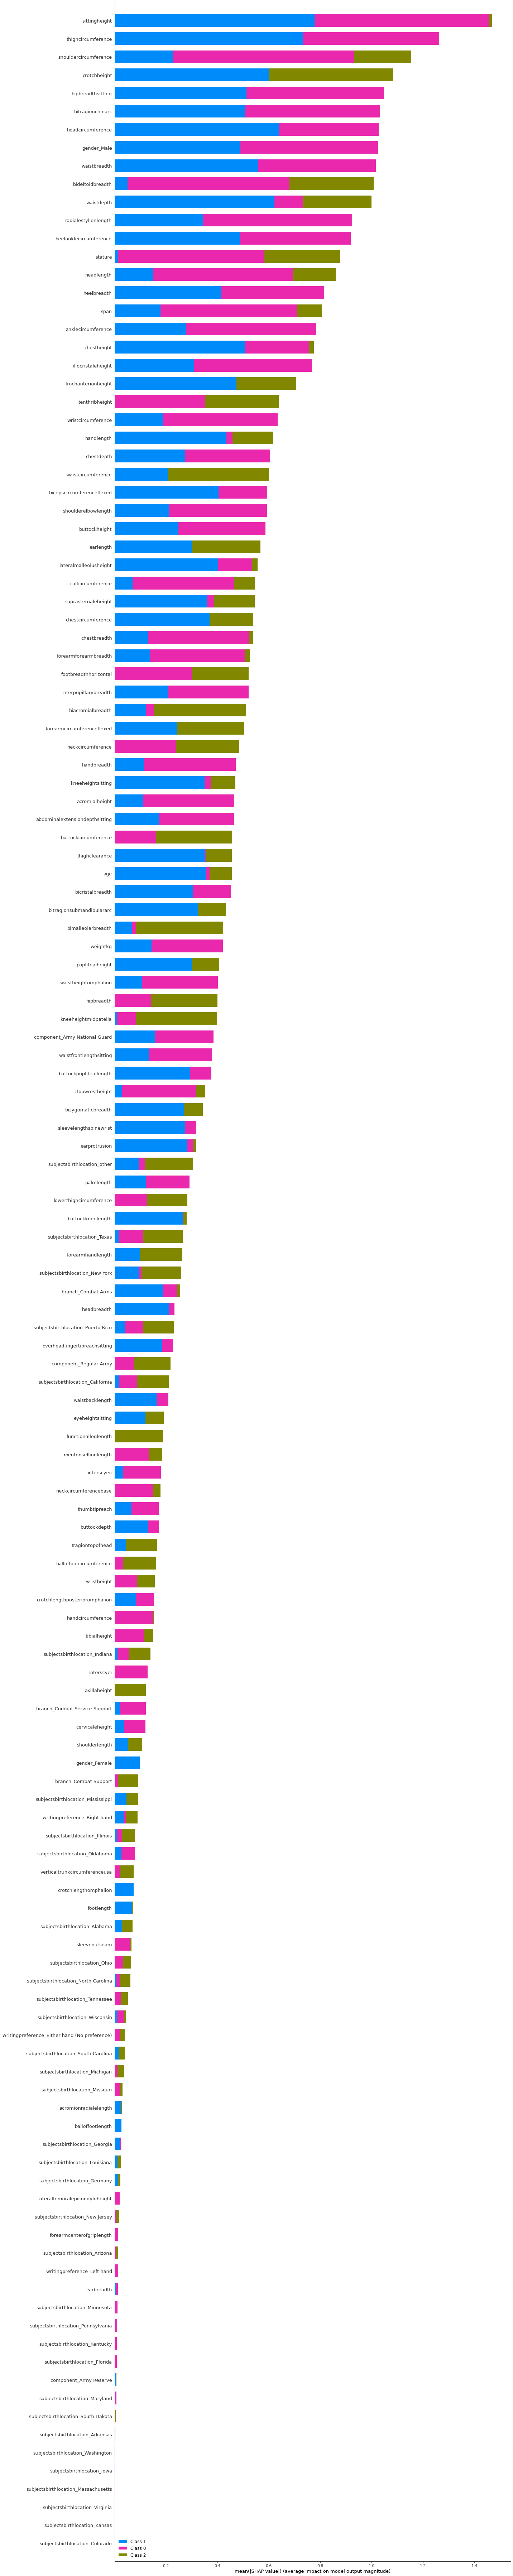

In [189]:
explainer = shap.Explainer(logistic_sha, x_train_sha)

shap_values = explainer.shap_values(x_train_sha)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


In [193]:
hes_feat = ['crotchheight',
'bideltoidbreadth',
'trochanterionheight',
'tenthribheight',
'waistcircumference',
'earlength',
'suprasternaleheight',
'chestcircumference',
'biacromialbreadth',
'forearmcircumferenceflexed',
'neckcircumference',
'buttockcircumference',
'bimalleolarbreadth',
'hipbreadth',
'kneeheightmidpatella',
'lowerthighcircumference',
'forearmhandlength',
'component',
'functionalleglength',
'tragiontopofhead',
'balloffootcircumference',
'subjectsbirthlocation',
'axillaheight',
'shoulderlength',
'branch',
'writingpreference',
'verticaltrunkcircumferenceusa'
]

In [194]:
x1 = x[hes_feat]

In [196]:
x1.head()

,crotchheight,bideltoidbreadth,trochanterionheight,tenthribheight,waistcircumference,earlength,suprasternaleheight,chestcircumference,biacromialbreadth,forearmcircumferenceflexed,neckcircumference,buttockcircumference,bimalleolarbreadth,hipbreadth,kneeheightmidpatella,lowerthighcircumference,forearmhandlength,component,functionalleglength,tragiontopofhead,balloffootcircumference,subjectsbirthlocation,axillaheight,shoulderlength,branch,writingpreference,verticaltrunkcircumferenceusa
0,877,493,919,1092,933,71,1449,1074,401,299,400,979,71,332,502,391,477,Regular Army,1136,140,253,other,1347,145,Combat Arms,Right hand,1700
1,851,479,918,1076,870,62,1387,1021,394,289,380,944,67,312,490,371,476,Regular Army,1096,120,245,New York,1293,141,Combat Support,Left hand,1627
2,854,544,918,1105,964,61,1438,1120,427,357,403,1054,75,349,496,409,491,Regular Army,1115,125,256,New York,1327,167,Combat Support,Left hand,1678
3,769,518,847,1021,857,66,1346,1114,401,318,407,991,73,338,460,393,467,Regular Army,1034,127,262,Wisconsin,1239,148,Combat Service Support,Right hand,1625
4,1014,524,1090,1292,868,56,1596,1048,435,324,398,1029,80,332,612,458,550,Regular Army,1279,122,267,North Carolina,1478,180,Combat Service Support,Right hand,1679


In [197]:
x1_cat = x1.select_dtypes("object").columns
x1_cat

Index(['component', 'subjectsbirthlocation', 'branch', 'writingpreference'], dtype='object')

In [198]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=101, stratify=y)

In [217]:
column_trans_hes = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), x1_cat),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [("one-hot", column_trans_hes),("under",under),("log", LogisticRegression(class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",))]

pipe_shap_model = impip(steps=operations_shap)
pipe_shap_model.fit(x_train1, y_train1)

Pipeline(steps=[('one-hot',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['component', 'subjectsbirthlocation', 'branch', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [218]:
eval_metric(pipe_shap_model, x_train1, y_train1, x_test1, y_test1)

Test_Set
[[519  78 161]
 [ 27 212  21]
 [ 24  17  95]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       758
           2       0.69      0.82      0.75       260
           3       0.34      0.70      0.46       136

    accuracy                           0.72      1154
   macro avg       0.65      0.73      0.66      1154
weighted avg       0.79      0.72      0.74      1154


Train_Set
[[2116  287  631]
 [ 103  868   67]
 [  92   31  420]]
              precision    recall  f1-score   support

           1       0.92      0.70      0.79      3034
           2       0.73      0.84      0.78      1038
           3       0.38      0.77      0.51       543

    accuracy                           0.74      4615
   macro avg       0.67      0.77      0.69      4615
weighted avg       0.81      0.74      0.76      4615



In [220]:
model = impip(steps=operations_shap)

scores = cross_validate(
    model, x_train1, y_train1, scoring=make_scorer(f1_score, average = None,labels =[3]), cv=5, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_score     0.488834
train_score    0.514416
dtype: float64

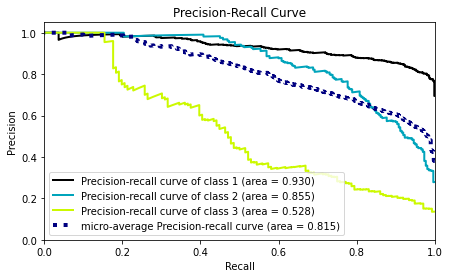

In [221]:
y_pred_proba = pipe_shap_model.predict_proba(x_test1)
plot_precision_recall(y_test1, y_pred_proba)
plt.show();

In [232]:
y_pred = pipe_shap_model.predict(x_test1)
y_pred_proba = pipe_shap_model.predict_proba(x_test1)
y_test_dummies = pd.get_dummies(y_test1).values 
shap_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
shap_f1 = f1_score(y_test1, y_pred, average=None, labels=[3])
shap_recall = recall_score(y_test1, y_pred, average=None, labels=[3])

# Compare Models

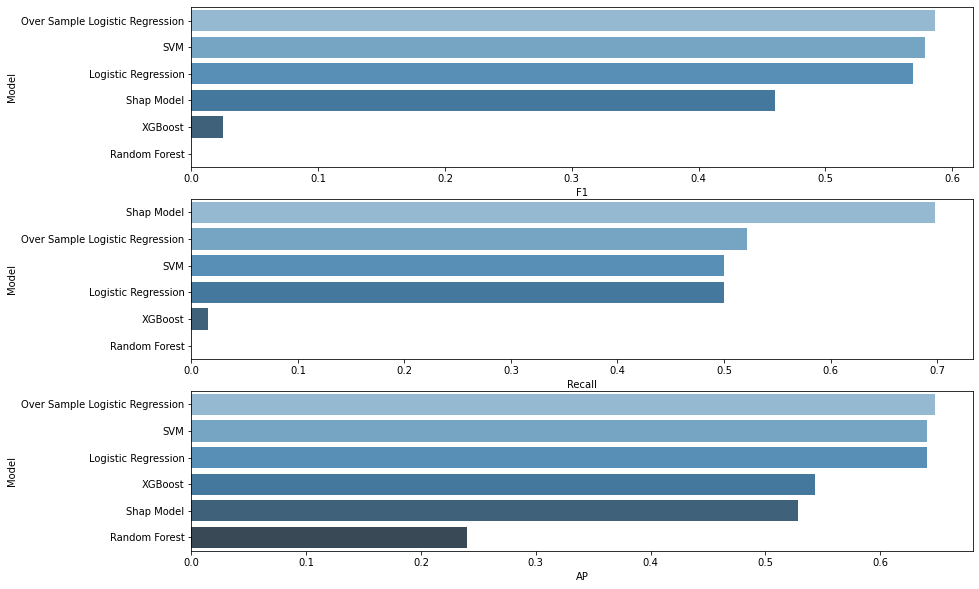

In [234]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Shap Model","Over Sample Logistic Regression" ,"SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], shap_f1[0], over_f1[0], svm_f1[0], random_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], shap_recall[0], over_recall[0], svm_recall[0], random_recall[0], xgb_recall[0]],
        "AP": [log_AP, shap_AP, over_AP, svm_AP, random_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")

plt.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [235]:
final_step = [('transformer', column_transformer), ('under', under) ,('scaler', StandardScaler()),
            ('logistic', LogisticRegression())]

In [236]:
final_pipe = impip(steps=final_step)
final_pipe.fit(x, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
               

In [238]:
y_pred = final_pipe.predict(x)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[3666   19  107]
 [ 102 1161   35]
 [ 255   25  399]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      3792
           2       0.96      0.89      0.93      1298
           3       0.74      0.59      0.65       679

    accuracy                           0.91      5769
   macro avg       0.87      0.82      0.84      5769
weighted avg       0.90      0.91      0.90      5769



#### Save the Model

In [241]:
pickle.dump(final_pipe, open('solider_race_final_model', 'wb'))

#### Load the Model

In [242]:
loaded_model = pickle.load(open('solider_race_final_model', 'rb'))

In [243]:
y_pred = loaded_model.predict(x)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[3666   19  107]
 [ 102 1161   35]
 [ 255   25  399]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      3792
           2       0.96      0.89      0.93      1298
           3       0.74      0.59      0.65       679

    accuracy                           0.91      5769
   macro avg       0.87      0.82      0.84      5769
weighted avg       0.90      0.91      0.90      5769



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___